In [51]:
import pandas as pd
import matplotlib.pyplot as ply
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [52]:
news = pd.read_excel('.\\파이썬+텍스트+분석+입문\\파이썬 텍스트 분석 입문\\data\\NewsResult_20201128-20211128.xlsx')

C:\Users\JAEHO\anaconda3\envs\py37-64\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [53]:
news.head(1)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100401e+06,20211128,동아일보,이은택,“선진국 백신 싹쓸이가 오미크론 확산 불렀다” 비판 커져,국제>유럽_EU,국제>미국_북미,국제>아시아,NaN,NaN,NaN,"바이든,아드하놈,고든 브라운,거브러여수스,조 바이든,글렌다,테워드로스","독일,프랑스,미국,파푸아뉴기니,보츠와나,아프리카,싱크탱크,원천,영국,짐바브웨,남아공...","미국,말라위,세계무역기구,화이자-바이오엔텍,EU,아스트라제네카,WTO,영국,의료연구...","싹쓸이,선진국,백신,오미크론,확산,비판,선진국들,자국민,접종,감염증,신종,코로나바이...","미국,오미크론,영국,선진국,남아공,독일,거브러여수스,지재권,세계무역기구,호주,아프리...",선진국들이 자국민 접종을 위해 신종 코로나바이러스 감염증(코로나19) 백신을 ‘싹쓸...,https://www.donga.com/news/article/all/2021112...,NaN


In [54]:
news['일자'].dtype

dtype('int64')

In [55]:
news = news.dropna(axis=1)

In [56]:
a=news.loc[news['일자'] == 20211125,'본문']

news['일자'] == 20211125 인덱스 취급할 수 있나보다

In [57]:
len(a.to_list())

49

In [58]:
data = []
for date in news['일자'].unique():
    d_news = news.loc[news['일자'] == date,'본문']

    if len(d_news)>10:
        text = ''.join(d_news.to_list())
        data.append({'date':date,'text':text})

dateNews = pd.DataFrame(data)
dateNews['date'] = pd.to_datetime(dateNews['date'].map(str))
dateNews


,date,text
0,2021-11-28,선진국들이 자국민 접종을 위해 신종 코로나바이러스 감염증(코로나19) 백신을 ‘싹쓸...
1,2021-11-27,신종 코로나바이러스 감염증(코로나19) 새 변이 ‘오미크론’(Ο)의 출현으로 백신 ...
2,2021-11-26,세계 각국이 아프리카 남부 보츠와나에서 처음 발견된 코로나19 신종 변이 바이러스의...
3,2021-11-25,이틀 연속 4000명 안팎 코로나 확진자가 쏟아지면서 중환자가 612명으로 연일 역...
4,2021-11-24,세계보건기구(WHO)가 23일(현지 시각) 내년 3월까지 유럽 지역에서 발생하는 코...
...,...,...
356,2020-12-02,영국 정부가 2일(현지시간) 미국 제약업체 화이자와 독일의 바이오엔테크가 개발한 신...
357,2020-12-01,김정은 북한 국무위원장이 중국 정부가 제공한 코로나19 백신을 접종했다는 주장에 대...
358,2020-11-30,김정은 북한 국무위원장이 코로나 백신을 맞았다는 주장이 나왔다. \n \n해리 카지...
359,2020-11-29,더불어민주당이 신종 코로나바이러스 감염증(코로나19) 백신 확보 물량을 당초 목표치...


In [59]:
def tokenizer(text):
    text = Mecab().nouns(text)
    return [word for word in text if len(word)>1]

vectorizer = TfidfVectorizer(tokenizer=tokenizer,
                            max_df=0.90,
                            min_df=2,
                            max_features=5000)
dateW_matrix = vectorizer.fit_transform(dateNews['text'])

In [60]:
dateW_matrix

<361x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 205113 stored elements in Compressed Sparse Row format>

In [61]:
nmf = NMF(n_components=20, alpha=0.2, random_state=3)
dateT = nmf.fit_transform(dateW_matrix)
TW = nmf.components_

C:\Users\JAEHO\anaconda3\envs\py37-64\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\Users\JAEHO\anaconda3\envs\py37-64\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [62]:
def print_top_words(TW, words, n_top_words=5):
    for topic_idx, word_vec in enumerate(TW):
        message = "Topic %d: " % topic_idx
        
        message += " ".join(["#"+words[i]
                     for i in word_vec.argsort()[:-n_top_words - 1:-1]])
        
        print(message)
        print()

print_top_words(TW, vectorizer.get_feature_names())

Topic 0: #아스트라 #영국 #허가 #러시아 #사용

Topic 1: #위드 #일상 #회복 #청원 #단계

Topic 2: #델타 #변이 #감염 #인도 #플러스

Topic 3: #혈전 #아스트라 #품청 #유럽 #중단

Topic 4: #회담 #정상 #한미 #바이든 #문재인

Topic 5: #청해부대 #문무 #대왕 #청해 #예약

Topic 6: #추석 #연휴 #유엔 #청원 #총회

Topic 7: #요양 #병원 #아스트라 #오전 #보건소

Topic 8: #단계 #거리 #수도 #두기 #모임

Topic 9: #계약 #백스 #도입 #노바 #확보

Topic 10: #예약 #대만 #잔여 #추경 #여행

Topic 11: #이란 #새해 #나포 #신년사 #신년

Topic 12: #얀센 #존슨 #영국 #정상 #콘월

Topic 13: #내년 #영국 #확보 #개발 #승인

Topic 14: #의료법 #의협 #의원 #의사 #개정안

Topic 15: #모더 #예약 #공급 #남북 #회분

Topic 16: #대표 #민주당 #지재 #재산 #경찰관

Topic 17: #획관 #역기 #기모란 #대행 #임명

Topic 18: #부회장 #중증 #삼성전자 #환자 #이재용

Topic 19: #오미크론 #변이 #남아프리카 #공화국 #남아공



In [63]:
df = stock.get_market_ohlcv_by_date('20201128','20211128','206650')

In [64]:
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-11-30,19600,20450,19250,20450,1573802
2020-12-01,20450,22400,20200,21250,4781343
2020-12-02,21300,21950,20550,21000,1977155
2020-12-03,21400,21750,21000,21500,1065345
2020-12-04,21350,21900,21050,21600,793130
...,...,...,...,...,...
2021-11-22,35200,35700,33900,34050,542348
2021-11-23,34050,36000,33350,34800,440293
2021-11-24,34800,34800,31350,33000,630796


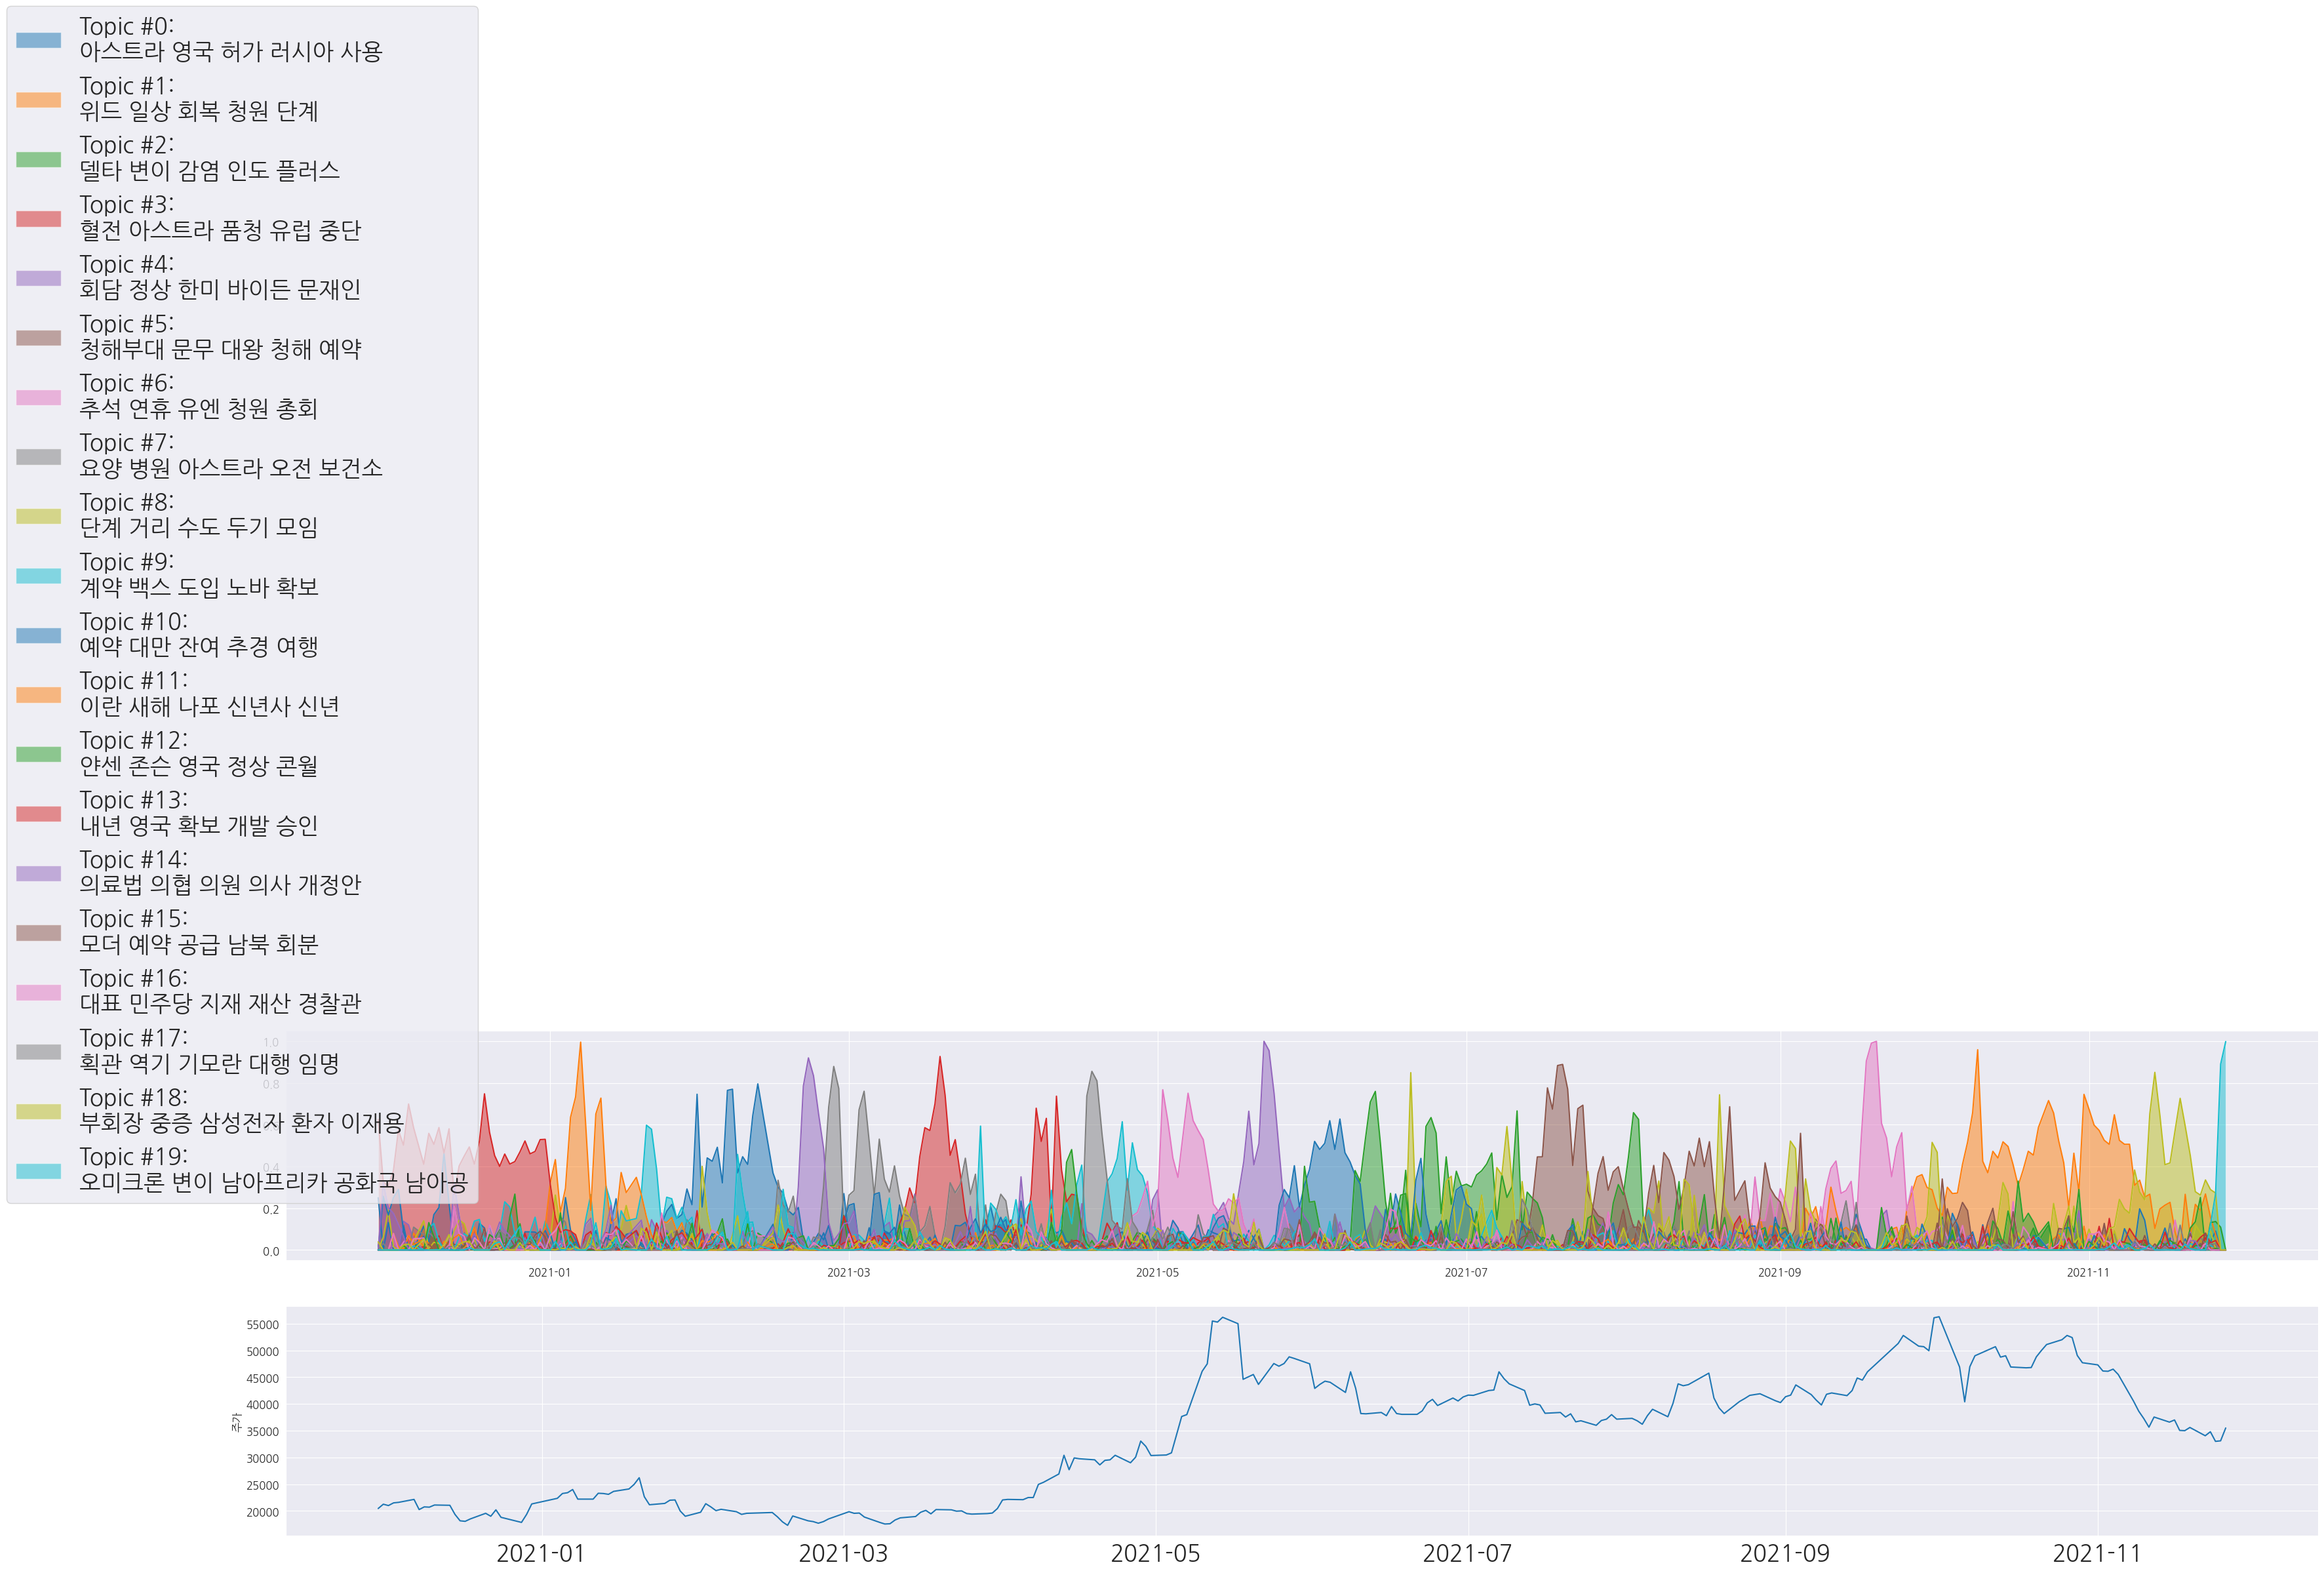

In [92]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pykrx import stock
sns.set_style("darkgrid")
matplotlib.rcParams['font.family'] = 'NanumGothic'

df = stock.get_market_ohlcv_by_date('20201128','20211128','206650')


def plotDateTopic(topic_id):
    
    label = "Topic #%d:\n" % topic_id
    label += " ".join([vectorizer.get_feature_names()[i]
                             for i in TW[topic_id].argsort()[:-6:-1]])
    
    h = dateT / dateT.sum(1, keepdims=True)
    h = h[:, topic_id].ravel()
    ax1 = plt.subplot(2,1,1)
    plt.plot(dateNews['date'], h)
    plt.fill_between(dateNews['date'], h, alpha=0.5, label=label)
    

plt.figure(figsize=(40, 10))

for i in range(20):
    plotDateTopic(i)
plt.legend(fontsize=25, bbox_to_anchor=(0.1, 0.2))

ax2 = plt.subplot(2,1,2)
plt.plot(df.index,df['종가'])
plt.ylabel('주가')

plt.xticks(fontsize=25)
plt.show()

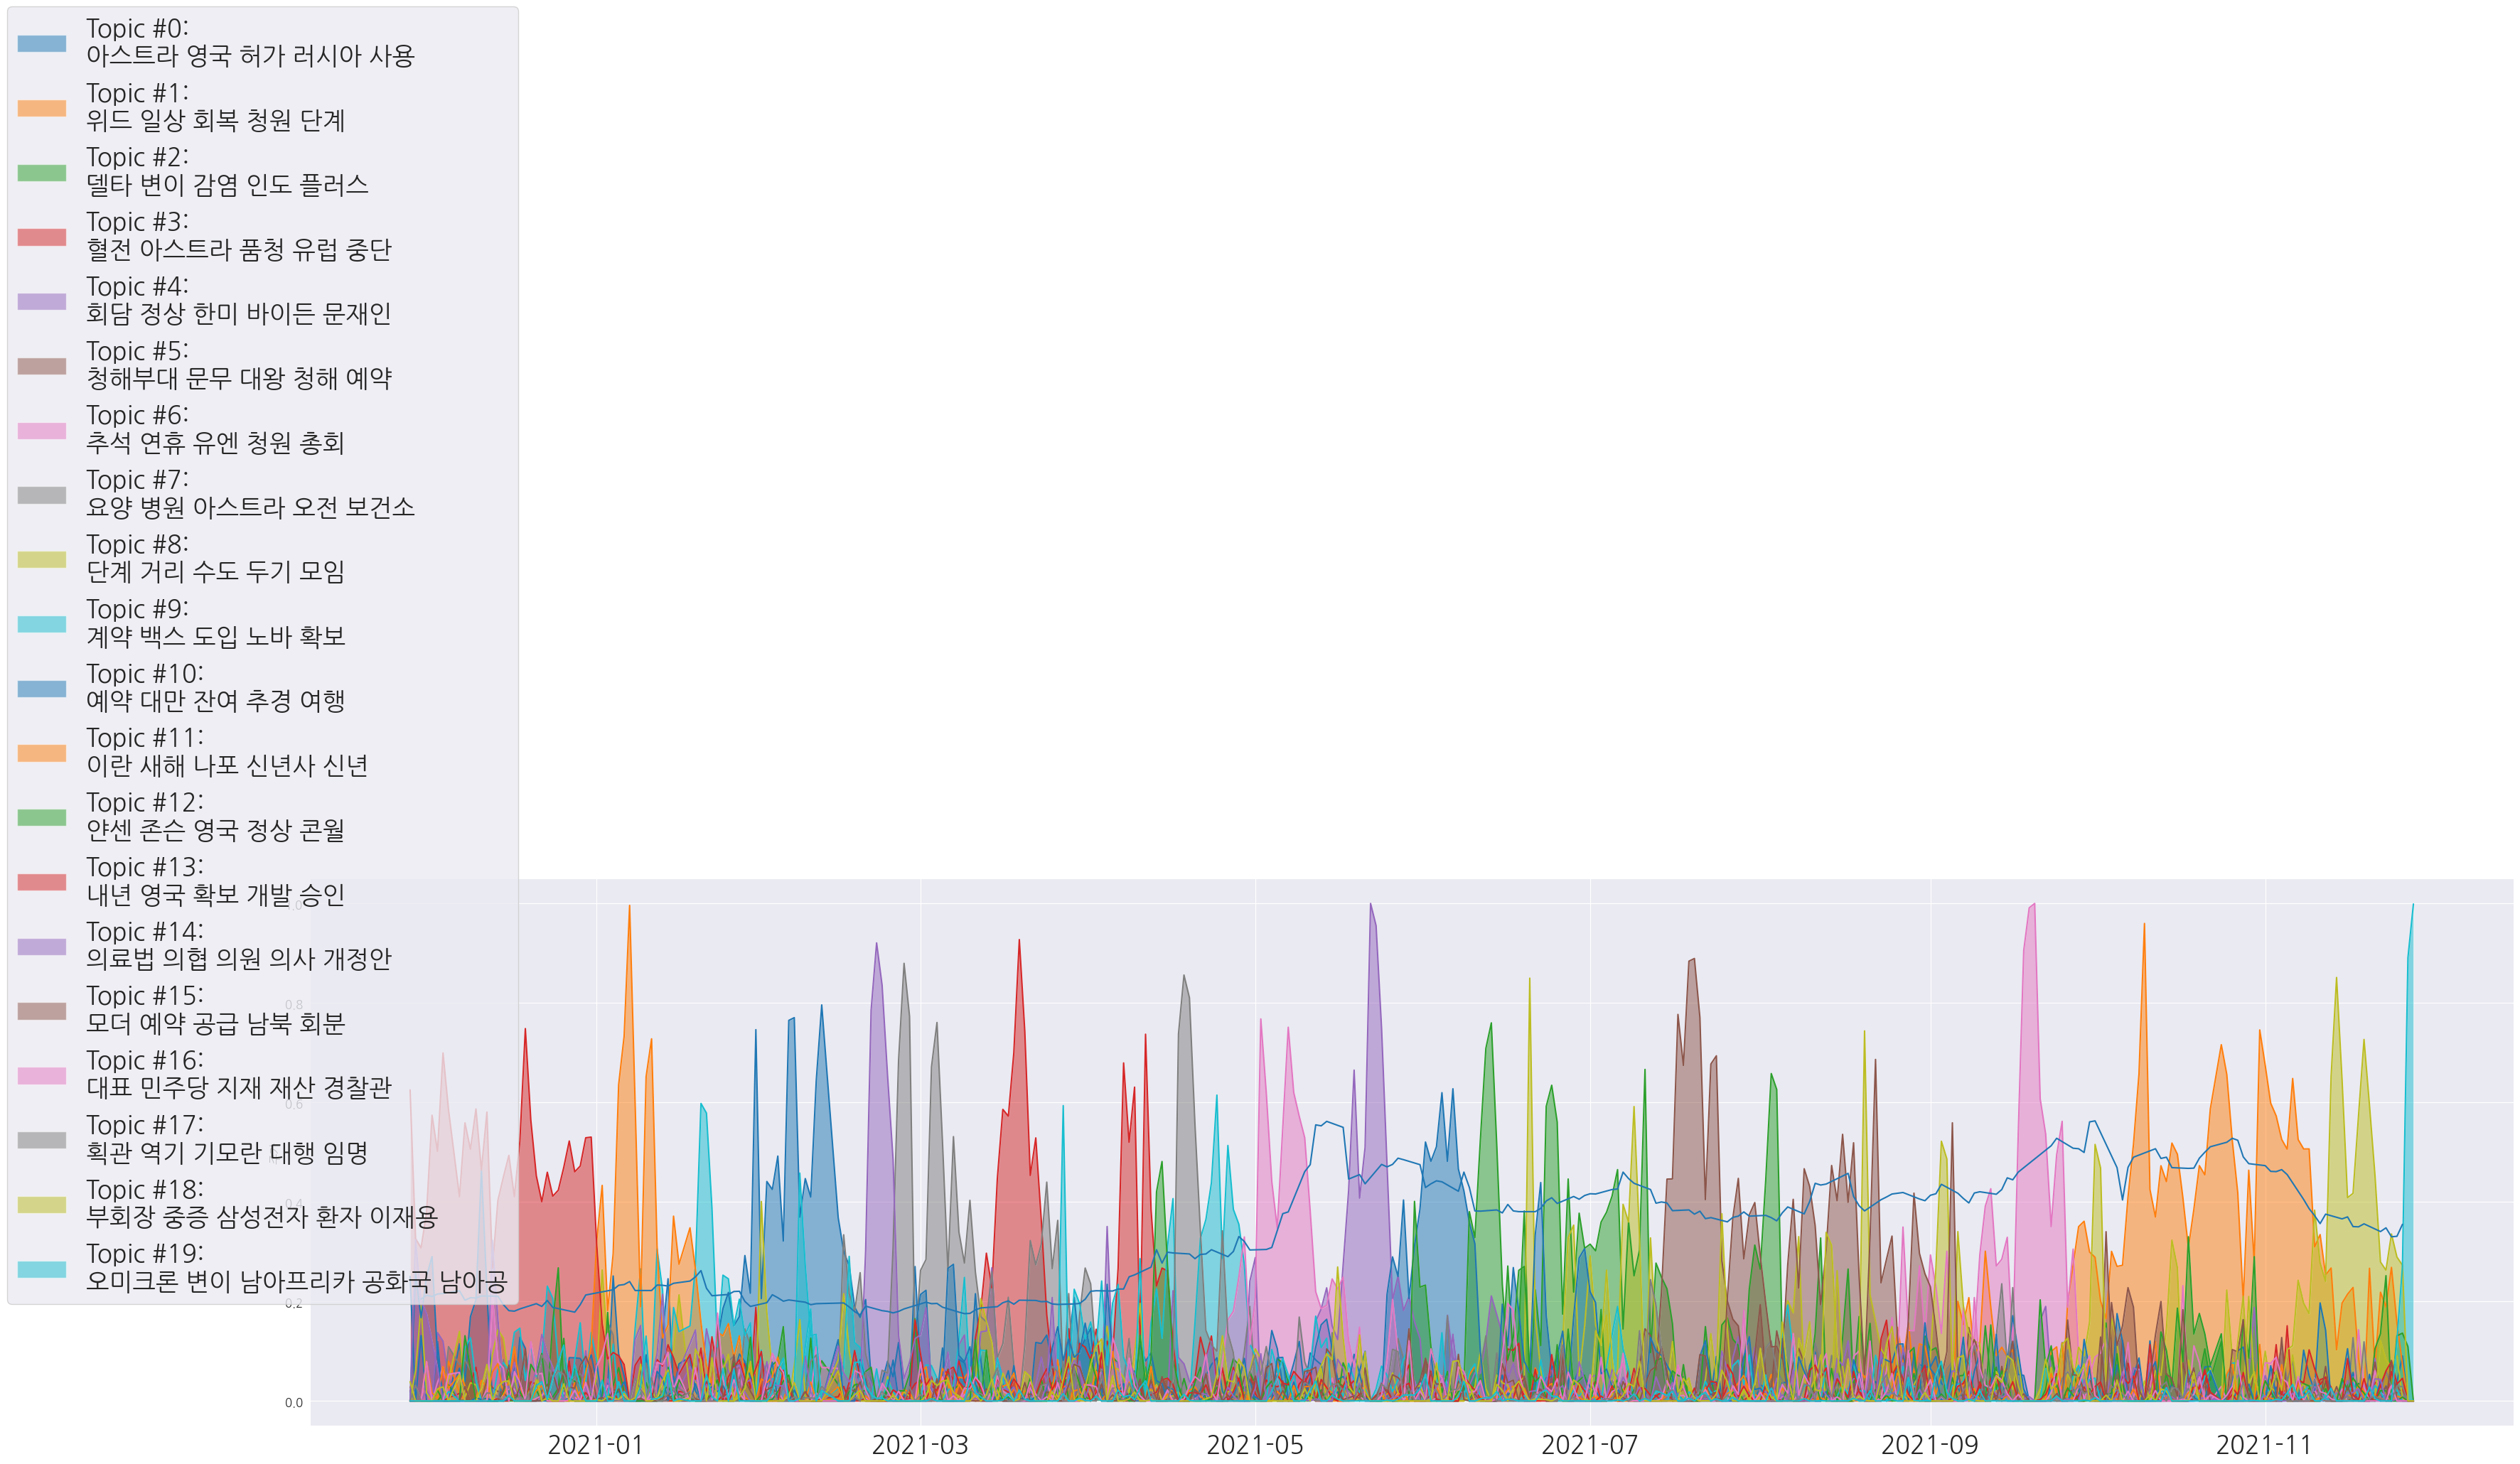

In [94]:
df = stock.get_market_ohlcv_by_date('20201128','20211128','206650')


def plotDateTopic(topic_id):
    
    label = "Topic #%d:\n" % topic_id
    label += " ".join([vectorizer.get_feature_names()[i]
                             for i in TW[topic_id].argsort()[:-6:-1]])
    
    h = dateT / dateT.sum(1, keepdims=True)
    h = h[:, topic_id].ravel()
    plt.plot(dateNews['date'], h)
    plt.fill_between(dateNews['date'], h, alpha=0.5, label=label)
    

plt.figure(figsize=(40, 10))

for i in range(20):
    plotDateTopic(i)
plt.legend(fontsize=25, bbox_to_anchor=(0.1, 0.2))

plt.plot(df.index,df['종가']/100000)
plt.ylabel('주가')

plt.xticks(fontsize=25)
plt.show()

C:\Users\JAEHO\anaconda3\envs\py37-64\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JAEHO\anaconda3\envs\py37-64\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


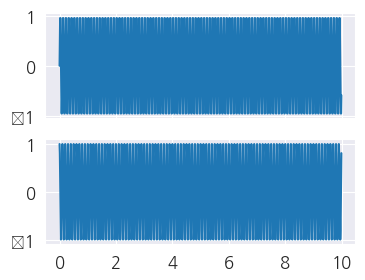

In [86]:
import numpy as np
import matplotlib.pyplot as plt

t= np.arange(1000)/100.
x = np.sin(2*np.pi*10*t)
y = np.cos(2*np.pi*10*t)

fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(t,x)
ax2.plot(t,y)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
# ax2.autoscale() ## call autoscale if needed

plt.show()